In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

%matplotlib inline

In [3]:
url = 'https://raw.githubusercontent.com/mariahsonja/natural-language-processing/main/data/IMDB%20Dataset.csv'
imdb_data = pd.read_csv(url)
imdb_data["sentiment"] = imdb_data["sentiment"].map({"positive": 1, "negative":0})

In [4]:
imdb_train = imdb_data["review"].values[:25000]
imdb_test = imdb_data["review"].values[25000:]

imdb_train_labels = imdb_data["sentiment"].values[:25000]
imdb_test_labels = imdb_data["sentiment"].values[25000:]

In [5]:
imdb_train[0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [6]:
vocab_size = 10000
embedding_dim = 16
max_length = 120  

In [7]:
tokenizer = Tokenizer(num_words=10000, oov_token = "")
tokenizer.fit_on_texts(imdb_train)
word_index = tokenizer.word_index

# converting words to numbers and pad for the neural network to use as input
train_sequences = tokenizer.texts_to_sequences(imdb_train)
train_padded = pad_sequences(train_sequences, maxlen=120, truncating="post")

# tokenized using the word_index learned from the training data
testing_sequences = tokenizer.texts_to_sequences(imdb_test)
test_padded = pad_sequences(testing_sequences, maxlen=120, truncating="post")

In [9]:
embedding_dim = 64

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.SimpleRNN(256),
    tf.keras.layers.Dense(1, activation = 'sigmoid')])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 64)          640000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 256)               82176     
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 722,433
Trainable params: 722,433
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
num_epochs = 5
history = model.fit(train_padded, imdb_train_labels, epochs=num_epochs, 
                    validation_data=(test_padded, imdb_test_labels), validation_steps=30)

Epoch 1/5
782/782 [==============================] - 121s 153ms/step - loss: 0.7056 - accuracy: 0.5008 - val_loss: 0.6942 - val_accuracy: 0.5080
Epoch 2/5
782/782 [==============================] - 119s 152ms/step - loss: 0.6985 - accuracy: 0.5042 - val_loss: 0.7078 - val_accuracy: 0.5003
Epoch 3/5
782/782 [==============================] - 121s 155ms/step - loss: 0.6958 - accuracy: 0.5179 - val_loss: 0.7226 - val_accuracy: 0.5004
Epoch 4/5
782/782 [==============================] - 117s 150ms/step - loss: 0.6846 - accuracy: 0.5542 - val_loss: 0.6853 - val_accuracy: 0.5449
Epoch 5/5
782/782 [==============================] - 118s 151ms/step - loss: 0.6390 - accuracy: 0.6277 - val_loss: 0.6924 - val_accuracy: 0.5722


In [12]:
sample_text_to_predict = ["The movie was cool. The animation and the graphics were out of this world. I would recommend this movie."]
train_sequences = tokenizer.texts_to_sequences(sample_text_to_predict)
pos_padded = pad_sequences(train_sequences, maxlen=20, truncating="post")

# making prediction
prediction = model.predict(pos_padded)
print(prediction)

1/1 [==============================] - 0s 372ms/step
[[0.5763793]]


In [13]:
sample_text_to_predict = ["The movie was not good. The animation and the graphics were terrible. I would not recommend this movie."]
train_sequences = tokenizer.texts_to_sequences(sample_text_to_predict)
neg_padded = pad_sequences(train_sequences, maxlen=20, truncating="post")

# making prediction
prediction = model.predict(neg_padded)
print(prediction)

1/1 [==============================] - 0s 33ms/step
[[0.3766971]]


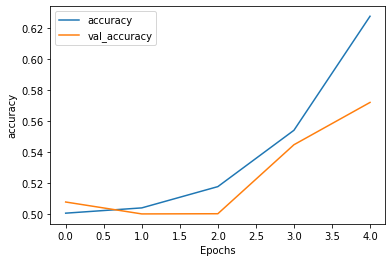

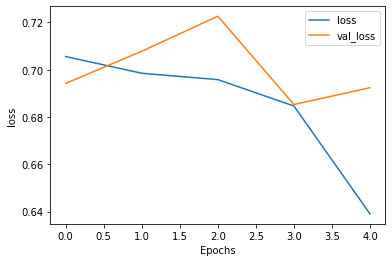

In [14]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+ string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
             
plot_graphs(history,'accuracy')
plot_graphs(history, 'loss')

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 64),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 64)          640000    
                                                                 
 lstm (LSTM)                 (None, 64)                33024     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 677,249
Trainable params: 677,249
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [18]:
epochs_num = 5
history = model.fit(train_padded, imdb_train_labels, epochs=epochs_num,
                    validation_data=(test_padded, imdb_test_labels), 
                    validation_steps=30)

Epoch 1/5
782/782 [==============================] - 74s 91ms/step - loss: 0.5884 - accuracy: 0.6554 - val_loss: 0.4301 - val_accuracy: 0.8171
Epoch 2/5
782/782 [==============================] - 72s 92ms/step - loss: 0.3557 - accuracy: 0.8512 - val_loss: 0.3841 - val_accuracy: 0.8353
Epoch 3/5
782/782 [==============================] - 71s 91ms/step - loss: 0.2805 - accuracy: 0.8878 - val_loss: 0.3886 - val_accuracy: 0.8382
Epoch 4/5
782/782 [==============================] - 71s 91ms/step - loss: 0.2431 - accuracy: 0.9060 - val_loss: 0.3929 - val_accuracy: 0.8366
Epoch 5/5
782/782 [==============================] - 77s 98ms/step - loss: 0.2145 - accuracy: 0.9184 - val_loss: 0.4354 - val_accuracy: 0.8335


In [20]:
sample_text_to_predict = ["The movie was cool. The animation and the graphics were out of this world. I would recommend this movie."]
train_sequences = tokenizer.texts_to_sequences(sample_text_to_predict)
pos_padded = pad_sequences(train_sequences, maxlen=20, truncating="post")

# making prediction
prediction = model.predict(pos_padded)
print(prediction)

1/1 [==============================] - 0s 35ms/step
[[0.59928215]]


In [22]:
sample_text_to_predict = ["The movie was not good. The animation and the graphics were terrible. I would not recommend this movie."]
train_sequences = tokenizer.texts_to_sequences(sample_text_to_predict)
neg_padded = pad_sequences(train_sequences, maxlen=20, truncating="post")

# making prediction
prediction = model.predict(neg_padded)
print(prediction)

1/1 [==============================] - 0s 40ms/step
[[0.20664096]]


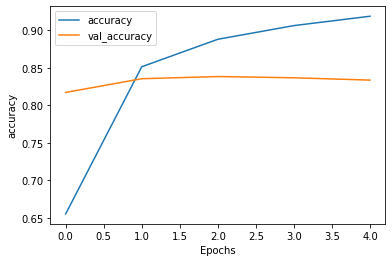

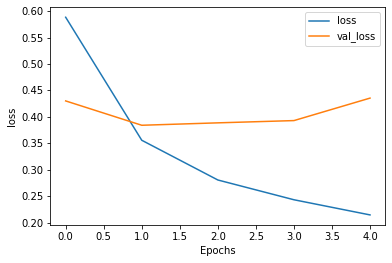

In [23]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [24]:
positive_review = ["The movie was cool. The animation and the graphics were out of this world. I would recommend this movie."]
negative_review = ["The movie was not good. The animation and the graphics were terrible. I would not recommend this movie."]

In [25]:
train_sequences = tokenizer.texts_to_sequences(positive_review)
pos_padded = pad_sequences(train_sequences, maxlen=20, truncating="post")

# making prediction
prediction = model.predict(pos_padded)
print(prediction)

1/1 [==============================] - 0s 27ms/step
[[0.59928215]]


In [26]:
train_sequences = tokenizer.texts_to_sequences(negative_review)
pos_padded = pad_sequences(train_sequences, maxlen=20, truncating="post")

# making prediction
prediction = model.predict(pos_padded)
print(prediction)

1/1 [==============================] - 0s 34ms/step
[[0.20664096]]
